In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import pydicom

# Exploring the data

### Names of files

In [2]:
train_folder = 'train_images'
test_folder = 'test_images'

In [3]:
train_metadata = 'train.csv'
test_metadata = 'test.csv'

In [4]:
example_submission = 'sample_submission.csv'

In [5]:
train_files = glob(train_folder + '/*')
test_files = glob(test_folder + '/*')
print(f'Number of Train_Files: {len(train_files)}; Number of Test_Files: {len(test_files)}')

Number of Train_Files: 11913; Number of Test_Files: 1


Only 1 Test_File, the rest (~8.000) are kept hidden on kaggle

### Check all training files: Files and/or Folder

In [6]:
train_files[:5]

['train_images/33624',
 'train_images/64153',
 'train_images/65117',
 'train_images/19605',
 'train_images/40910']

In [7]:
def check_folder_file(list_to_check):
    
    num_files = 0  # number of files
    num_folders = 0  # number of folders
    
    for element in list_to_check:
        if os.path.isfile(element):  # if the file is a file
            num_files += 1  # add one
        if os.path.isdir(element):  # same for folder
            num_folders += 1
            
    return num_folders, num_files

In [8]:
num_train_folders, num_train_files = check_folder_file(train_files)

In [9]:
print(f'Train_Folders: {num_train_folders}; Train_Files: {num_train_files}')

Train_Folders: 11913; Train_Files: 0


Only folders in Train_Folder; Now check for the number of files in each of these folders

In [10]:
def get_file_numbers(folders):
    
    num_files = []  # list to add each number for later visualization
    
    for folder in folders:
        num = len(os.listdir(folder))  # number of current folder
        num_files.append(num)  # add it to numbers
    
    min_files = min(num_files)  # minimum number of files
    max_files = max(num_files)  # maximum number of files
    
    file_count = {}  # dict: key is the number of files; value is the count it appears in folders
    
    for num in range(min_files, max_files + 1):  # from min to max + 1 (exclusive)
        
        file_count[num] = num_files.count(num)  # count teh number of times num appears in num_files
    
    print(file_count)
    
    return file_count

In [11]:
file_count_train = get_file_numbers(train_files)

{4: 8233, 5: 1767, 6: 1218, 7: 276, 8: 229, 9: 99, 10: 53, 11: 19, 12: 12, 13: 5, 14: 2}


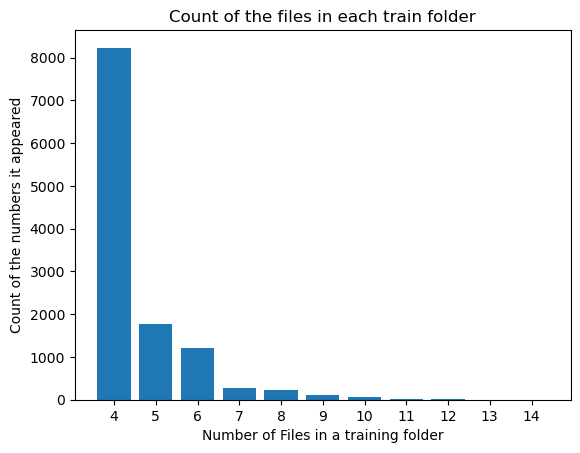

In [12]:
plt.bar(list(file_count_train.keys()), list(file_count_train.values()))
plt.title('Count of the files in each train folder')
plt.xlabel('Number of Files in a training folder')
plt.ylabel('Count of the numbers it appeared')
plt.xticks(range(min(list(list(file_count_train.keys()))), max(list(file_count_train.keys())) + 1))
plt.show()

Important on how to feed the data into the nn later

### Check for the files types and if each folder contains only one format

In [13]:
def check_same_format(folders):
    
    folders_single_datatype = 0
    folders_multiple_datatypes = 0
    
    for folder in folders:
        files = os.listdir(folder)
        endings = [file.split('.')[-1] for file in files]  # list with file ending for each folder
        if len(set(endings)) == 1:  # remove dublicates: if len is one it only has one datatype
            folders_single_datatype += 1
        else:
            folders_multiple_datatypes += 1
    
    print(f'Folder with multiple datatypes: {folders_multiple_datatypes}; With single: {folders_single_datatype}')

In [14]:
check_same_format(train_files)

Folder with multiple datatypes: 0; With single: 11913


#### All files in a folder contain the same datatype; now check for the datatype

In [15]:
def check_datatype(folders):
    
    datatypes = []
    
    for folder in folders:
        file = os.listdir(folder)[0]  # just take the first cause all have the same type anyway
        ending = file.split('.')[-1]  # take the ending and append it
        datatypes.append(ending)
        
    types_unique = list(set(datatypes))
    
    print(types_unique)

In [16]:
check_datatype(train_files)

['dcm']


dcm is the only datatype; evaluate this next

In [17]:
train_files[0]

'train_images/33624'

In [18]:
os.listdir(train_files[0])

['788897862.dcm', '1462078398.dcm', '1362210397.dcm', '1111416410.dcm']

### Evaluate the dcm datatype

In [19]:
train_files[0]

'train_images/33624'

In [20]:
exp_train_files = os.listdir(train_files[0])
exp_folder = train_files[0]
exp_train_paths = [os.path.join(exp_folder, filename) for filename in exp_train_files]
exp_train_paths

['train_images/33624/788897862.dcm',
 'train_images/33624/1462078398.dcm',
 'train_images/33624/1362210397.dcm',
 'train_images/33624/1111416410.dcm']

In [21]:
(exp_1, exp_2, exp_3, exp_4) = (pydicom.dcmread(file) for file in exp_train_paths)

In [22]:
type(exp_1)

pydicom.dataset.FileDataset

In [23]:
exp_1

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.33624.1.788897862
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.33624.1.788897862
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184435.016458'
(0010, 0020) Patient ID                          LO: '33624'
(0018, 11a0) Body Part Thickness                 DS: '60.0'
(001

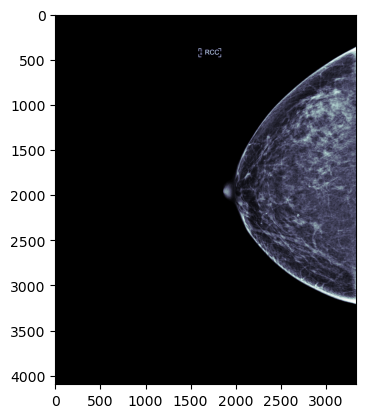

In [38]:
plt.imshow(exp_1.pixel_array, cmap=plt.cm.bone)
plt.show()

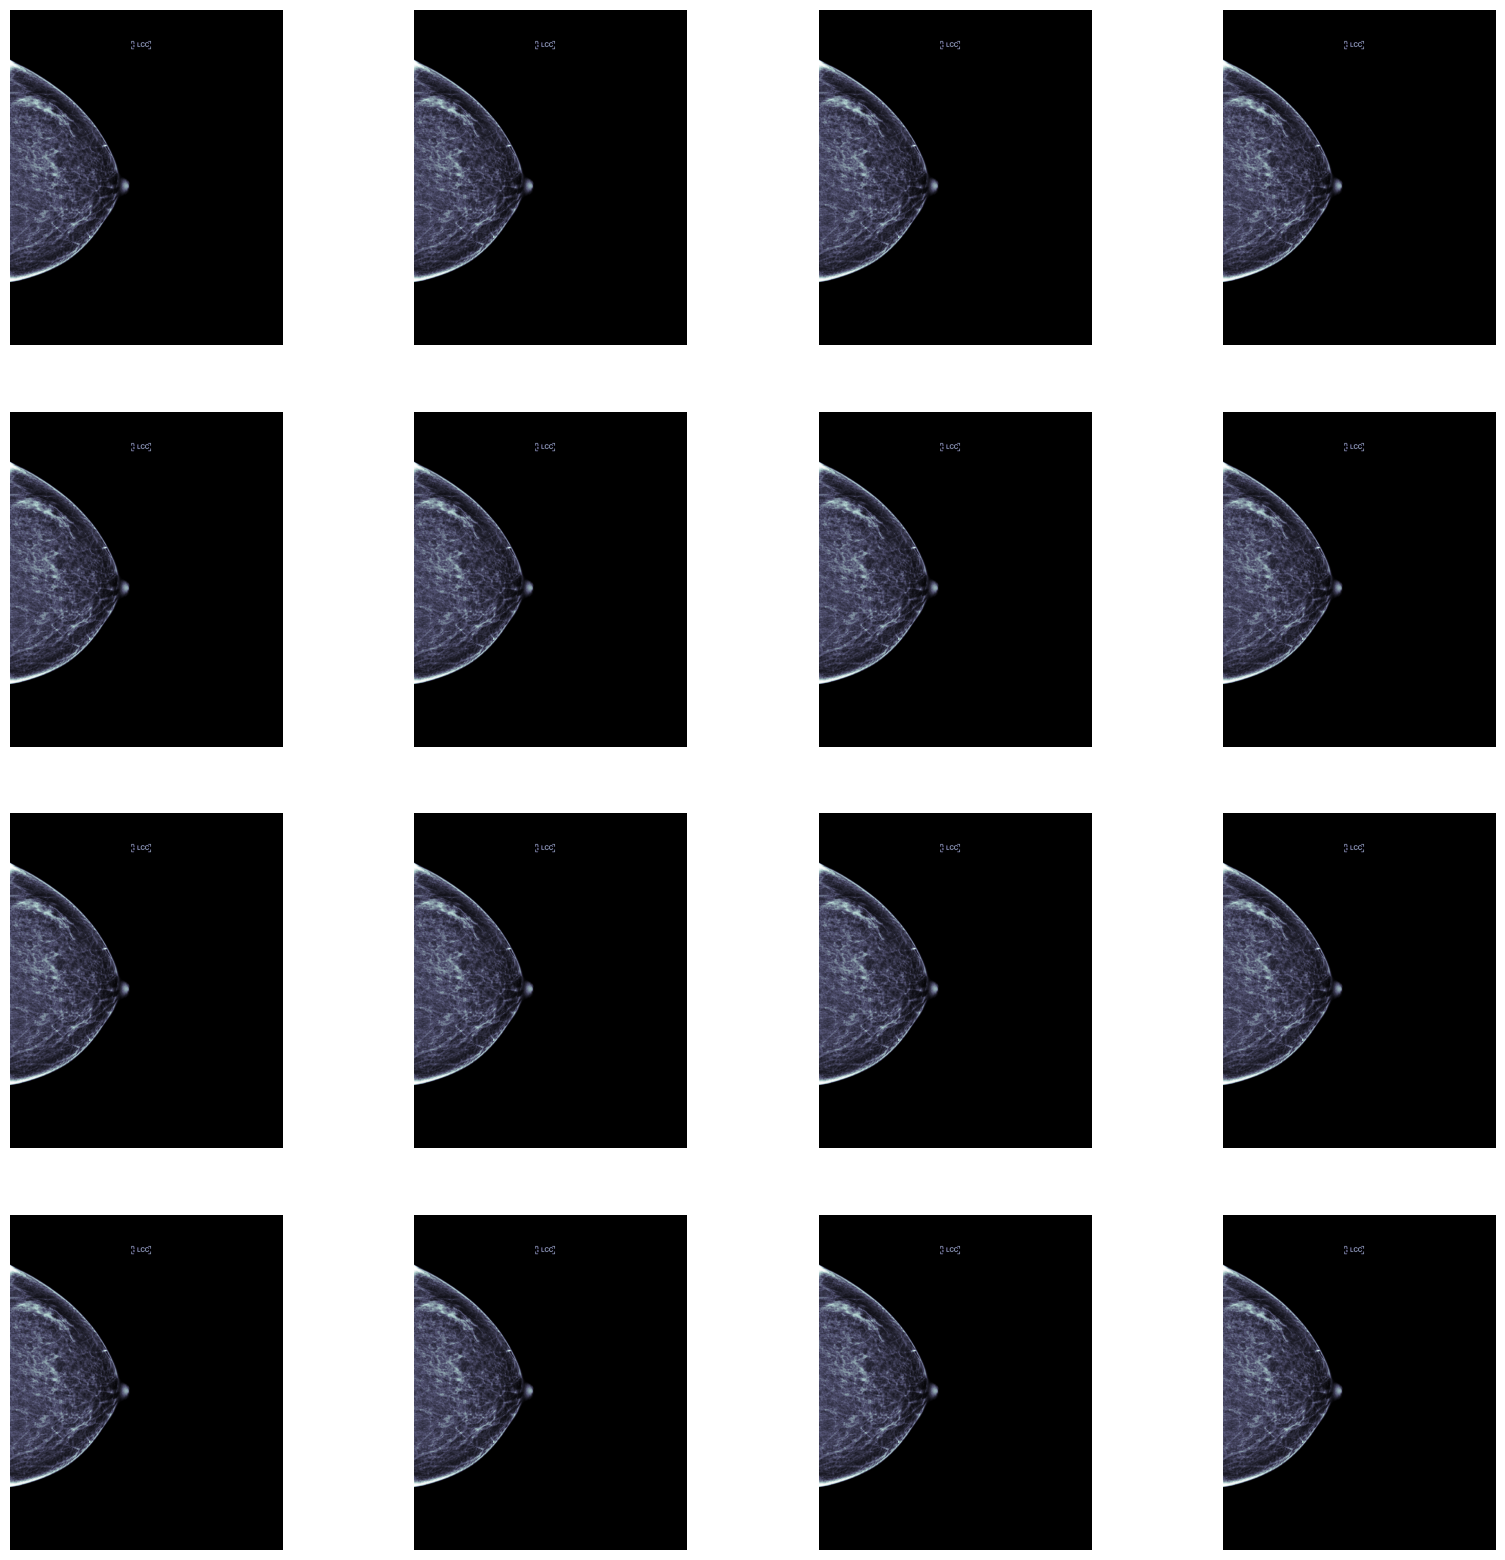

In [35]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for col in range(4):
    folder = train_files[col]
    files = os.listdir(folder)
    for row in range(4):
        file_path = os.path.join(folder, files[row])
        img = pydicom.dcmread(file_path)
        ax[row, col].imshow(exp_2.pixel_array, cmap=plt.cm.bone)
        ax[row, col].axis('off')

In [29]:
train_files[:4]

['train_images/33624',
 'train_images/64153',
 'train_images/65117',
 'train_images/19605']